In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind, norm

Simulated user-aggregated data from an experiment with webpage views and button clicks attributes. I'll check how views were changed
- data: https://www.kaggle.com/datasets/ahmedmohameddawoud/ecommerce-ab-testing?select=ab_test.csv

In [2]:
df = pd.read_csv('ab_test_results_aggregated_views_clicks_2.csv')

In [3]:
control = df.loc[df['group'] == 'control', 'views']
test = df.loc[df['group'] == 'test', 'views']

count    60000.000000
mean         4.952400
std          5.781752
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        131.000000
Name: views, dtype: float64


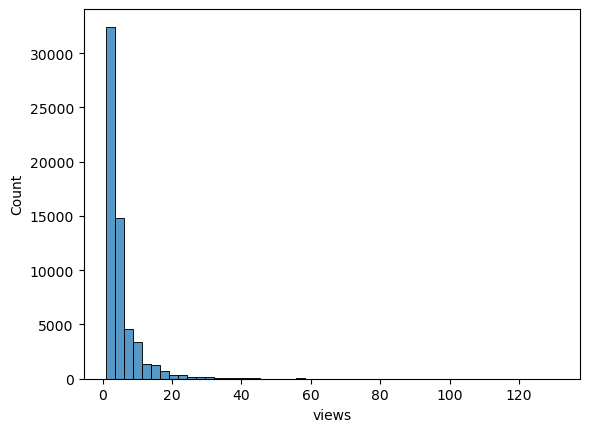

In [4]:
print(control.describe())
sns.histplot(control,bins=50);

count    60000.000000
mean         5.029750
std          6.045503
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        205.000000
Name: views, dtype: float64


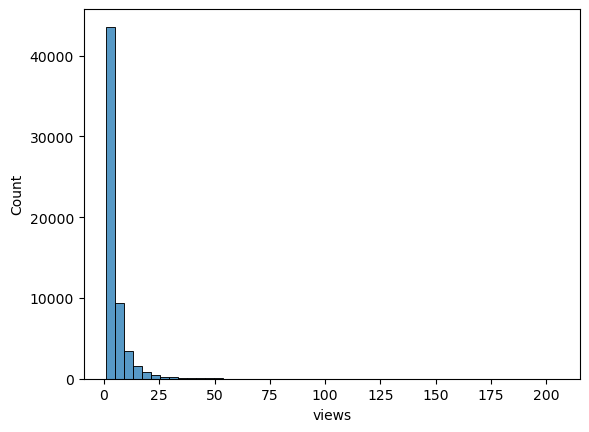

In [5]:
print(test.describe())
sns.histplot(test,bins=50);

Test and control groups have exponential distribution. We can try to get logarithm from the values to normalize the data. But I will use bootstap to get a simulation of the general distribution.

In [72]:
class Bootstrap:
    def __init__(self,df1,df2=[],k=1000):
        self.df1 = df1
        self.df2= df2
        self.n = max([len(df1), len(df2)])
        self.k = k
        
    def run(self):
        if len(self.df2) == 0:
            i = 0
            boots = []
            while i < self.k:
                sample = np.random.choice(self.df1, self.n, True)
                boots.append(np.mean(sample))
                i+=1
            return boots
        else:
            i = 0
            boots = []
            while i < self.k:
                sample1 = np.random.choice(self.df1, self.n, True)
                sample2 = np.random.choice(self.df2, self.n, True)
                sample = sample1 - sample2
                boots.append(np.mean(sample))
                i+=1
            p_1 = norm.cdf(
            x = 0, 
            loc = np.mean(boots), 
            scale = np.std(boots)
            )
            p_2 = norm.cdf(
                x = 0, 
                loc = -np.mean(boots), 
                scale = np.std(boots)
            )
            p_value = min(p_1, p_2) * 2
            # print(p_value)
            return (boots,p_value)
        

In [73]:
control_boots = Bootstrap(df1=control).run()
test_boots = Bootstrap(df1=test).run()

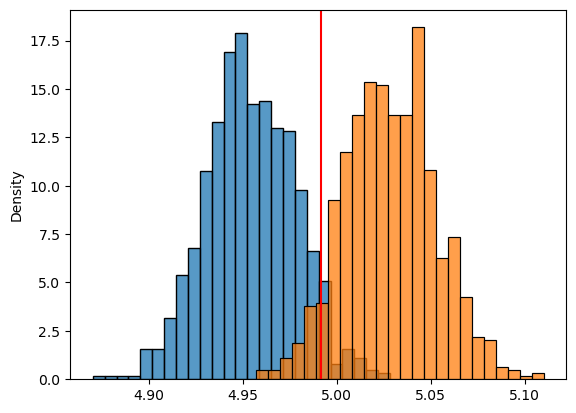

In [74]:
ax = sns.histplot(data=control_boots,stat='density', common_norm=False)
ax = sns.histplot(test_boots,stat='density', common_norm=False)
ax.axvline(x = np.percentile(control_boots, 95), ymin = 0, ymax = 1, color='red');

It seems like mean of the test group more than 95 percentile of the control group, and we can reject H0. Let's check p-value of the T-test.

In [55]:
# #mannwhitneyu and ttest
# mannwhitneyu(control, test, alternative="less", method="exact")

In [56]:
ttest_ind(control, test, alternative="less")

Ttest_indResult(statistic=-2.2649520442300783, pvalue=0.01175869889174895)

count pvalue of the bootstrapped difference between control and sampe dataframes

In [76]:
Bootstrap(df1=control, df2=test).run()[1]

0.01858307813432038